In [298]:
if __name__ == '__main__':
    %run Importing.ipynb
    %run Cleaning.ipynb
    %run Transforming.ipynb
    %run Sampling.ipynb
    %run Models/LinearRegression.ipynb

In [299]:
    myImports = Importing()
    url = "https://raw.githubusercontent.com/dayanaviana/WGU/main/datasources/churn_clean.csv"
    df = myImports.import_from_url(url)

Importing init
Imported
['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


In [300]:
    myCleaning = Cleaning(df)
    list_to_remove = ["Customer_id","Interaction","UID","State","TimeZone","City","County","Zip","Lat","Lng","Job","Item1","Item2","Item3","Item4","Item5","Item6","Item7","Item8"]
    myCleaning.remove_columns(list_to_remove)
    df = myCleaning._df


Cleaning init
Columns Removed.
['Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

Complete details in df_info.txt file


In [301]:
    categorical_columns_list = myImports.get_categorical_columns_list(df)
    numerical_columns_list = myImports.get_numerical_columns_list(df)

    myTransformations = Transforming(df)
    myTransformations.categorical_columns_to_dummy(categorical_columns_list)
    df = myTransformations._df
    df.head()


Categorical Columns
['Area', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

Numerical Columns
['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

Transforming init

Got Dummy variables
['Area_Suburban', 'Area_Urban', 'Marital_Married', 'Marital_Never_Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Churn_Yes', 'Techie_Yes', 'Contract_One_year', 'Contract_Two_Year', 'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber_Optic', 'InternetService_None', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentM

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit_Card_automatic,PaymentMethod_Electronic_Check,PaymentMethod_Mailed_Check
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,38,Urban,0,68,28561.99,Widowed,Male,No,7.978323,10,...,1,1,0,0,0,1,1,1,0,0
2,10446,Urban,1,27,21704.77,Married,Female,Yes,11.699080,12,...,1,0,0,0,1,1,1,0,0,0
3,3735,Urban,4,50,9609.57,Widowed,Female,No,10.752800,9,...,0,0,0,0,0,1,1,1,0,0
4,13863,Suburban,1,48,18925.23,Married,Male,No,14.913540,15,...,1,0,0,0,1,0,1,0,0,1
5,11352,Suburban,0,83,40074.19,Separated,Male,Yes,8.147417,16,...,0,0,0,1,1,0,0,0,0,1


In [302]:
   
    categorical_columns_list = myImports.get_categorical_columns_list(df)
    numerical_columns_list = myImports.get_numerical_columns_list(df)

    mySampling = Sampling()
    df = myImports.filter_df_by_columns(df, numerical_columns_list)
    target = 'MonthlyCharge'
    stratif_by = 'Churn_Yes'
    x_train, x_test, y_train, y_test = mySampling.stratified_sampling(df, target, stratif_by)
    



Categorical Columns
['Area', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

Numerical Columns
['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Area_Suburban', 'Area_Urban', 'Marital_Married', 'Marital_Never_Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Churn_Yes', 'Techie_Yes', 'Contract_One_year', 'Contract_Two_Year', 'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber_Optic', 'InternetService_None', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Credit_Card_automatic', 'PaymentMet

In [303]:
myLinearRegression = LinearRegression()
numeric_columns = numerical_columns_list
numeric_columns.remove(target)
train_df = x_train.join(y_train)
myLinearRegression.multiple_linear_regression(target, numeric_columns, train_df)


LinearRegression init

formula =  MonthlyCharge ~ Population + Children + Age + Income + Outage_sec_perweek + Email + Contacts + Yearly_equip_failure + Tenure + Bandwidth_GB_Year + Area_Suburban + Area_Urban + Marital_Married + Marital_Never_Married + Marital_Separated + Marital_Widowed + Gender_Male + Gender_Nonbinary + Churn_Yes + Techie_Yes + Contract_One_year + Contract_Two_Year + Port_modem_Yes + Tablet_Yes + InternetService_Fiber_Optic + InternetService_None + Phone_Yes + Multiple_Yes + OnlineSecurity_Yes + OnlineBackup_Yes + DeviceProtection_Yes + TechSupport_Yes + StreamingTV_Yes + StreamingMovies_Yes + PaperlessBilling_Yes + PaymentMethod_Credit_Card_automatic + PaymentMethod_Electronic_Check + PaymentMethod_Mailed_Check + 0

R-squared =  0.9992548715186094
R-squared adjusted =  0.9992508044570907
MSE =  23.733142439223503
RSE =  23.61105139495205
MRSE =  4.858426224639804
RSE =  4.871667316147882

Model summary saved on model_summary.txt


/Users/dayanaviana/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312664.12736336724, tolerance: 1285.0855493406336
  model = cd_fast.enet_coordinate_descent(


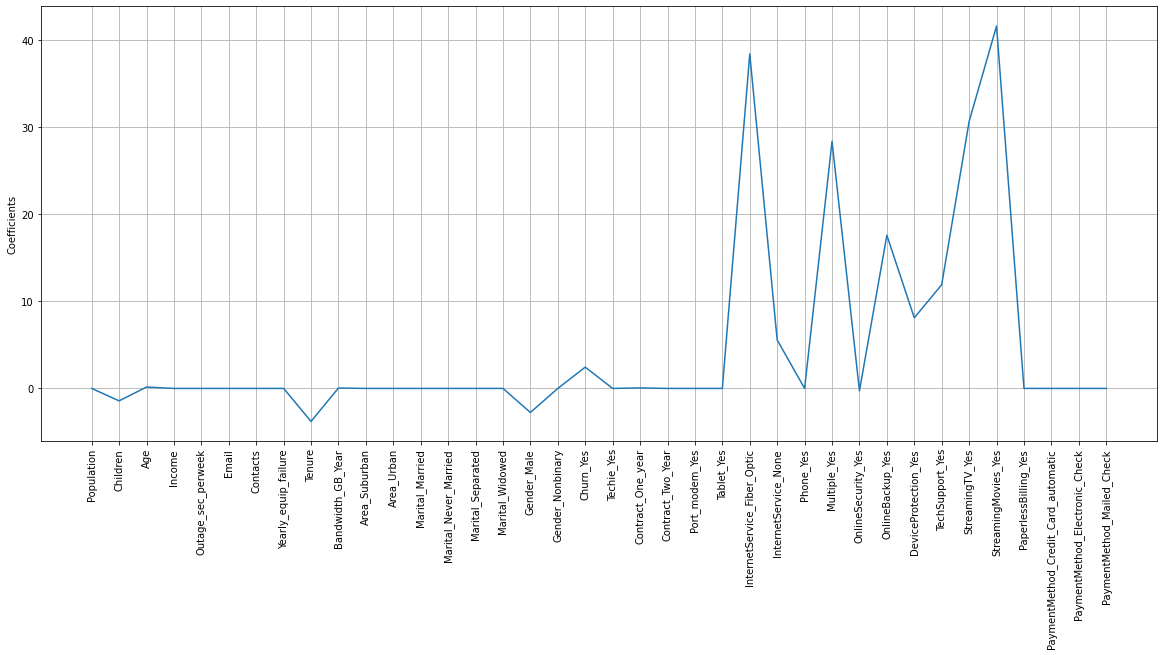

In [304]:
x = x_train
y = y_train
candidates_columns = numeric_columns
LinearRegression.lasso_for_feature(x, y, candidates_columns)

having a model that is too performant is not always a good thing. For instance, it can be a marker of overfitting: the model corresponds too closely to a particular set of data, and may therefore fail to predict future observations reliably. 

https://easystats.github.io/parameters/articles/parameters_selection.html

In [305]:
formula =  "MonthlyCharge ~ InternetService_Fiber_Optic + Multiple_Yes + OnlineBackup_Yes + TechSupport_Yes + StreamingTV_Yes + StreamingMovies_Yes + 0"
myLinearRegression.multiple_linear_regression_by_formula(formula, train_df)


formula =  MonthlyCharge ~ InternetService_Fiber_Optic + Multiple_Yes + OnlineBackup_Yes + TechSupport_Yes + StreamingTV_Yes + StreamingMovies_Yes + 0

R-squared =  0.958659205023577
R-squared adjusted =  0.9586237396575692
MSE =  1310.7241355120993
RSE =  1309.9749362348741
MRSE =  36.18840501709994
RSE =  36.20392431093761

Model summary saved on model_summary.txt
